## Finding insides from AirBnB in Berlin

In this project I used the [Cross Industry Process](https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining) for Data Mining on the [Berlin AirBnB dataset](http://insideairbnb.com/get-the-data.html). I hope this project will give you some valuable insides for Berlin.

The CRISP-DM process can be broken down into several steps which help understanding the problem

- Business Understanding
- Data Understanding
- Prepare Data
- Data Modeling
- Evaluate the Results
- Deploy


In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

from support import *

plt.style.use('ggplot')  # Красивые графики
plt.rcParams['figure.figsize'] = (15, 5)  # Размер картинок



In [2]:
# debug mode
debug = True

## Business Understanding


## Data Understanding

To answer the questions curated below it is necessary to obtain some sort of Data understanding. This includes a general overview of what kind of information is available within the dataset. But also where there might be potential shortcomings, such as missing data. 

We are going to work with such datasets:

- listings.csv consists of details of all the listings in Berlin including their price, accomodates, ratings, number of reviews, summary, name, owner name, Description, host Id and many other columns decribing details of listings.

- calendar.csv consists of details of listings and its availability and its price.


In [3]:
# Reat the data
listings = pd.read_csv('data/listings.csv.gz', low_memory=False, compression="gzip")
# calendar = pd.read_csv('./calendar.csv')

In [5]:
# Checking the shape of the listings dataset
# if debug: 
   
listings.shape

# listings.head()

(24586, 106)

In [8]:
if debug:
# Show all cols in the head
    pd.options.display.max_columns = listings.shape[1]
    listings.describe()

In [9]:
# Data owerview 
if debug:
    colcheck(listings)

0    1944
1    3176
2    3309
3    6883
4    7071
Name: id, dtype: int64
Missing (%): 0.0
----------
0    https://www.airbnb.com/rooms/1944
1    https://www.airbnb.com/rooms/3176
2    https://www.airbnb.com/rooms/3309
3    https://www.airbnb.com/rooms/6883
4    https://www.airbnb.com/rooms/7071
Name: listing_url, dtype: object
Missing (%): 0.0
----------
0    20191112224519
1    20191112224519
2    20191112224519
3    20191112224519
4    20191112224519
Name: scrape_id, dtype: int64
Missing (%): 0.0
----------
0    2019-11-14
1    2019-11-14
2    2019-11-14
3    2019-11-14
4    2019-11-14
Name: last_scraped, dtype: object
Missing (%): 0.0
----------
0                               cafeheaven Pberg/Mitte
1                      Fabulous Flat in great Location
2                    BerlinSpot Schöneberg near KaDeWe
3    Stylish East Side Loft in Center with AC & 2 b...
4                     BrightRoom with sunny greenview!
Name: name, dtype: object
Missing (%): 0.0020743512568128205
-------

In [15]:
# Present cols with missed values
if debug:
    listings.isnull().mean()

In [10]:
#Provide a set of column name that have no values and must be dropped
if debug:
    listings.columns[listings.isnull().mean() == 1]

In [ ]:
#listings.columns.tolist()

In [ ]:
if debug:
    listings.hist(figsize=(16,100),layout=(44,1));

In [ ]:
if debug:
    plt.figure(figsize=(16,10))
    sns.heatmap(listings.corr(), annot=True, fmt='.1f')

In [6]:
if debug:
    listings.dtypes.value_counts()

## Prepare Data

decide on the data that we are going to use for our analysis. 

In [7]:
# Define a subset of the original Listing dataset
ss = listings[['id','price', 'property_type', 'bedrooms', 'minimum_nights',
               'number_of_reviews', 'reviews_per_month','review_scores_value', 'availability_365', 'availability_90', 'availability_60', 'availability_30']]

#To simplify let's use only appartments
ss = ss[ss['property_type']=='Apartment']

# After filtering out only the apartments let's drop property_type
ss = ss.drop(columns=['property_type'])

In [8]:
if debug:
    showmissing(ss)

In [8]:
#Drop missing values
ss.dropna(axis=0)

,id,price,bedrooms,minimum_nights,number_of_reviews,reviews_per_month,review_scores_value,availability_365,availability_90,availability_60,availability_30
0,1944,$21.00,1.0,60,18,0.24,8.0,251,25,25,9
1,3176,$90.00,1.0,62,145,1.14,9.0,344,69,39,9
2,3309,$28.00,1.0,7,27,0.35,9.0,317,42,12,0
4,7071,$33.00,1.0,3,266,2.13,10.0,30,30,30,21
5,9991,$180.00,4.0,6,7,0.13,10.0,45,8,1,0
...,...,...,...,...,...,...,...,...,...,...,...
24394,39868831,$70.00,0.0,1,1,1.00,10.0,87,87,57,30
24399,39879765,$50.00,2.0,2,1,1.00,10.0,70,70,40,15
24404,39883210,$40.00,1.0,1,2,2.00,8.0,358,83,53,24
24456,39942426,$20.00,1.0,1,1,1.00,10.0,53,53,27,14


In [9]:
# Clearing the price

# ss = ss.replace({'price': r'\$(\d{,3})\,?(\d{,3})\.*(\d{,3})'}, {'price': r'\1\2'}, regex=True)
# ss.price = ss['price'].astype(int)

ss['price'] = ss['price'].str.replace(',', '')
ss['price'] = ss['price'].str.replace('$', '')
ss['price'] = ss['price'].astype(float)
ss['price'].describe()


count    21849.000000
mean        61.782461
std         91.428355
min          0.000000
25%         33.000000
50%         49.000000
75%         75.000000
max       9000.000000
Name: price, dtype: float64

In [53]:
#Values destributon
ss.price.value_counts(normalize = True, bins = 20)

(-9.001, 450.0]     0.997757
(450.0, 900.0]      0.001693
(900.0, 1350.0]     0.000320
(4950.0, 5400.0]    0.000046
(1350.0, 1800.0]    0.000046
(1800.0, 2250.0]    0.000046
(8550.0, 9000.0]    0.000046
(4050.0, 4500.0]    0.000046
(5400.0, 5850.0]    0.000000
(5850.0, 6300.0]    0.000000
(4500.0, 4950.0]    0.000000
(8100.0, 8550.0]    0.000000
(3600.0, 4050.0]    0.000000
(3150.0, 3600.0]    0.000000
(2700.0, 3150.0]    0.000000
(2250.0, 2700.0]    0.000000
(6300.0, 6750.0]    0.000000
(6750.0, 7200.0]    0.000000
(7200.0, 7650.0]    0.000000
(7650.0, 8100.0]    0.000000
Name: price, dtype: float64

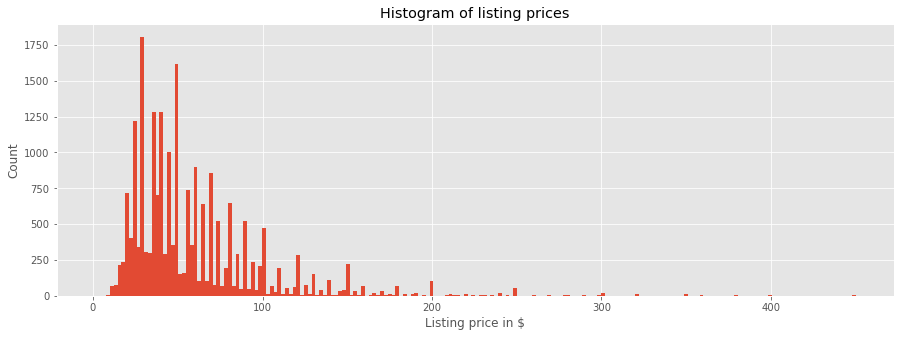

In [7]:
ss.loc[(ss.price <= 450) & (ss.price > 0)].price.hist(bins=200)
plt.ylabel('Count')
plt.xlabel('Listing price in $')
plt.title('Histogram of listing prices');


In [10]:
# Remowe all prices higher then 450
ss = ss[ss['price'] <= 450]

In [8]:
ss.head()

,id,price,bedrooms,minimum_nights,number_of_reviews,reviews_per_month,review_scores_value,availability_365,availability_90,availability_60,availability_30
0,1944,21.0,1.0,60,18,0.24,8.0,251,25,25,9
1,3176,90.0,1.0,62,145,1.14,9.0,344,69,39,9
2,3309,28.0,1.0,7,27,0.35,9.0,317,42,12,0
4,7071,33.0,1.0,3,266,2.13,10.0,30,30,30,21
5,9991,180.0,4.0,6,7,0.13,10.0,45,8,1,0


In [58]:
# pd.options.display.max_columns = listings.shape[1]
# listings[listings['id'] == 22673624]#[['id','price']]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
14265,22673624,https://www.airbnb.com/rooms/22673624,20191112224519,2019-11-14,Cozy Apartment Kreuzberg (4 BR & 2 Baths),Wunderschöne 130m2 Wohnung in Kreuz-Kölln! Die...,Wunderschöne 130m2 Wohnung in Kreuz-Kölln! Die...,Wunderschöne 130m2 Wohnung in Kreuz-Kölln! Die...,none,NaN,Please no downloading of ilegal material or co...,The metro station Gneisenaustrasse is directly...,You have the whole apartment for yourselves :)!,You can always call me.,HOUSE RULES Remember // Act responsible & peac...,NaN,NaN,https://a0.muscache.com/im/pictures/f4821733-e...,NaN,167067226,https://www.airbnb.com/users/show/167067226,Magali,2018-01-10,DE,NaN,within an hour,87%,NaN,t,https://a0.muscache.com/im/pictures/user/bc068...,https://a0.muscache.com/im/pictures/user/bc068...,Kreuzberg,10.0,10.0,"['email', 'phone', 'jumio', 'offline_governmen...",t,f,"Berlin, Berlin, Germany",Kreuzberg,Tempelhofer Vorstadt,Friedrichshain-Kreuzberg,Berlin,Berlin,10961,Berlin,"Berlin, Germany",DE,Germany,52.49331,13.39669,t,Apartment,Entire home/apt,15,2.0,4.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets all...",NaN,$500.00,NaN,NaN,$0.00,$80.00,2,$20.00,2,1125,2,2,1125,1125,2.0,1125.0,3 days ago,t,17,47,77,167,2019-11-14,67,50,2018-07-07,2019-10-26,95.0,10.0,9.0,10.0,9.0,10.0,9.0,t,NaN,NaN,t,f,flexible,f,f,9,9,0,0,4.05


In [11]:
# Add boolean values
boolean_feature = ['host_identity_verified', 'instant_bookable', 'host_is_superhost']
for i in boolean_feature:
    ss[i] = listings[i].map({'t': True, 'f': False})
ss.head()

,id,price,bedrooms,minimum_nights,number_of_reviews,reviews_per_month,review_scores_value,availability_365,availability_90,availability_60,availability_30,host_identity_verified,instant_bookable,host_is_superhost
0,1944,21.0,1.0,60,18,0.24,8.0,251,25,25,9,True,False,False
1,3176,90.0,1.0,62,145,1.14,9.0,344,69,39,9,True,False,False
2,3309,28.0,1.0,7,27,0.35,9.0,317,42,12,0,False,False,False
4,7071,33.0,1.0,3,266,2.13,10.0,30,30,30,21,True,False,True
5,9991,180.0,4.0,6,7,0.13,10.0,45,8,1,0,True,False,False


In [12]:
# boolean_feature = ['host_identity_verified', 'instant_bookable', 'host_is_superhost']
# for i in boolean_feature:
ss['host_is_superhost'].value_counts()

False    18462
True      3314
Name: host_is_superhost, dtype: int64

In [13]:
# Cancelation policy cleaning
ss = pd.concat([ss, pd.get_dummies(listings['cancellation_policy'])],axis=1)
ss.head()

,id,price,bedrooms,minimum_nights,number_of_reviews,reviews_per_month,review_scores_value,availability_365,availability_90,availability_60,availability_30,host_identity_verified,instant_bookable,host_is_superhost,flexible,moderate,strict,strict_14_with_grace_period,super_strict_30,super_strict_60
0,1944.0,21.0,1.0,60.0,18.0,0.24,8.0,251.0,25.0,25.0,9.0,True,False,False,0,1,0,0,0,0
1,3176.0,90.0,1.0,62.0,145.0,1.14,9.0,344.0,69.0,39.0,9.0,True,False,False,0,0,0,1,0,0
2,3309.0,28.0,1.0,7.0,27.0,0.35,9.0,317.0,42.0,12.0,0.0,False,False,False,0,0,0,1,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0
4,7071.0,33.0,1.0,3.0,266.0,2.13,10.0,30.0,30.0,30.0,21.0,True,False,True,0,1,0,0,0,0


In [14]:
#Room type
ss = pd.concat([ss, pd.get_dummies(listings['room_type'])],axis=1)
ss.head()

,id,price,bedrooms,minimum_nights,number_of_reviews,reviews_per_month,review_scores_value,availability_365,availability_90,availability_60,...,flexible,moderate,strict,strict_14_with_grace_period,super_strict_30,super_strict_60,Entire home/apt,Hotel room,Private room,Shared room
0,1944.0,21.0,1.0,60.0,18.0,0.24,8.0,251.0,25.0,25.0,...,0,1,0,0,0,0,0,0,1,0
1,3176.0,90.0,1.0,62.0,145.0,1.14,9.0,344.0,69.0,39.0,...,0,0,0,1,0,0,1,0,0,0
2,3309.0,28.0,1.0,7.0,27.0,0.35,9.0,317.0,42.0,12.0,...,0,0,0,1,0,0,0,0,1,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,1,0,0,0
4,7071.0,33.0,1.0,3.0,266.0,2.13,10.0,30.0,30.0,30.0,...,0,1,0,0,0,0,0,0,1,0


In [15]:
# Neigbohurs
ss = pd.concat([ss, pd.get_dummies(listings['neighbourhood_group_cleansed'])],axis=1)

In [16]:
#amenities
tempdf = listings.copy()

tempdf['amenities'] = tempdf['amenities'].map(lambda x: x.replace('"','').replace('{','').replace('}','').split(','))
unique_amenities = np.unique(np.concatenate(tempdf['amenities'].values))
amenities_array = np.array([tempdf['amenities'].map(lambda x: i in x) for i in unique_amenities])
amenities_array_t = amenities_array.T
amenities_df = pd.DataFrame(data=amenities_array_t, columns=unique_amenities)
amenities_df.head()

,,toilet,24-hour check-in,Accessible-height bed,Accessible-height toilet,Air conditioning,Air purifier,Amazon Echo,BBQ grill,Baby bath,...,Wide doorway to guest bathroom,Wide entrance,Wide entrance for guests,Wide entryway,Wide hallways,Wifi,Window guards,Wine cooler,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,True
3,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True


In [17]:
# The data had some outliers, which I quickly dropped
amenities_df.drop(amenities_df.columns[[0, 176, 177]],axis=1,inplace=True)
amenities_df.head()

,toilet,24-hour check-in,Accessible-height bed,Accessible-height toilet,Air conditioning,Air purifier,Amazon Echo,BBQ grill,Baby bath,Baby monitor,...,Wheelchair accessible,Wide clearance to shower,Wide doorway to guest bathroom,Wide entrance,Wide entrance for guests,Wide entryway,Wide hallways,Wifi,Window guards,Wine cooler
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [18]:
features = pd.concat([ss, amenities_df], axis=1)
print(features.shape)

(24586, 211)


In [19]:
features = features.dropna(axis=0)
print(features.shape)

(17720, 211)


In [20]:
features.head()

,id,price,bedrooms,minimum_nights,number_of_reviews,reviews_per_month,review_scores_value,availability_365,availability_90,availability_60,...,Wheelchair accessible,Wide clearance to shower,Wide doorway to guest bathroom,Wide entrance,Wide entrance for guests,Wide entryway,Wide hallways,Wifi,Window guards,Wine cooler
0,1944.0,21.0,1.0,60.0,18.0,0.24,8.0,251.0,25.0,25.0,...,False,False,False,False,False,False,False,True,False,False
1,3176.0,90.0,1.0,62.0,145.0,1.14,9.0,344.0,69.0,39.0,...,False,False,False,False,False,False,False,True,False,False
2,3309.0,28.0,1.0,7.0,27.0,0.35,9.0,317.0,42.0,12.0,...,False,False,False,False,False,False,False,True,False,False
4,7071.0,33.0,1.0,3.0,266.0,2.13,10.0,30.0,30.0,30.0,...,False,False,False,False,False,False,False,True,False,False
5,9991.0,180.0,4.0,6.0,7.0,0.13,10.0,45.0,8.0,1.0,...,False,False,False,False,False,False,False,True,False,False


## Data modelling

In [21]:
X = features.drop('price', axis=1)
y = features['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=42
)

# Instantiate
lm_model = LinearRegression()

# Fit the model
lm_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
# Predict price
predicted_train_price = lm_model.predict(X_test)

In [23]:
# Rsquared here for comparing test and preds from model
r2_test = r2_score(y_test, predicted_train_price)
r2_test

0.49765018480837164

In [27]:
coefs = list(zip(lm_model.coef_, features))
coefs.sort(reverse=True)
coefs

[(74.7291908481016, 'Fireplace guards'),
 (70.58897885545893, 'Air conditioning'),
 (61.13360338634588, 'Lock on bedroom door'),
 (60.91245792330459, 'Iron'),
 (58.76559604214356, 'Smart TV'),
 (56.25204511843769, 'Breakfast table'),
 (34.325788319444015, 'Stair gates'),
 (34.32578831944351, 'DVD player'),
 (22.69350394609879, 'Shampoo'),
 (22.176251821723806, 'price'),
 (20.953672585759463, 'Pocket wifi'),
 (20.792950809078288, 'super_strict_60'),
 (20.740135896389337, 'EV charger'),
 (19.411389607931536, 'Elevator'),
 (17.271325088824092, 'Mobile hoist'),
 (17.271325088823986, 'High chair'),
 (15.781677725230637, 'Pool with pool hoist'),
 (15.019205583825636, 'En suite bathroom'),
 (12.250010251648145, 'Gas oven'),
 (11.738462554297072, 'strict_14_with_grace_period'),
 (11.43588065254962, 'Beach view'),
 (11.354418015730758, 'Marzahn - Hellersdorf'),
 (11.30594830753264, 'Other'),
 (11.305672390385341, 'Heated floors'),
 (11.071269082298592, 'Other pet(s)'),
 (10.920691593141415, 'Fr

In [28]:
neighborhoods = np.unique(listings['neighbourhood_group_cleansed'])
neighborhood_impact = [i for i in coefs if i[1] in neighborhoods]
neighborhood_impact.sort(reverse=True)

In [29]:
for index, val in neighborhood_impact:
    print(index, val)

11.354418015730758 Marzahn - Hellersdorf
10.716541641186607 Charlottenburg-Wilm.
8.356453973593755 Neukölln
7.122394992980357 Mitte
3.560477501746076 Steglitz - Zehlendorf
2.48977427173393 Treptow - Köpenick
-0.8929903274902791 Friedrichshain-Kreuzberg
-2.6576773454452294 Tempelhof - Schöneberg
-4.792406923339818 Spandau
-9.337594422181633 Pankow
-11.7985991602723 Lichtenberg
-15.771163483346054 Reinickendorf


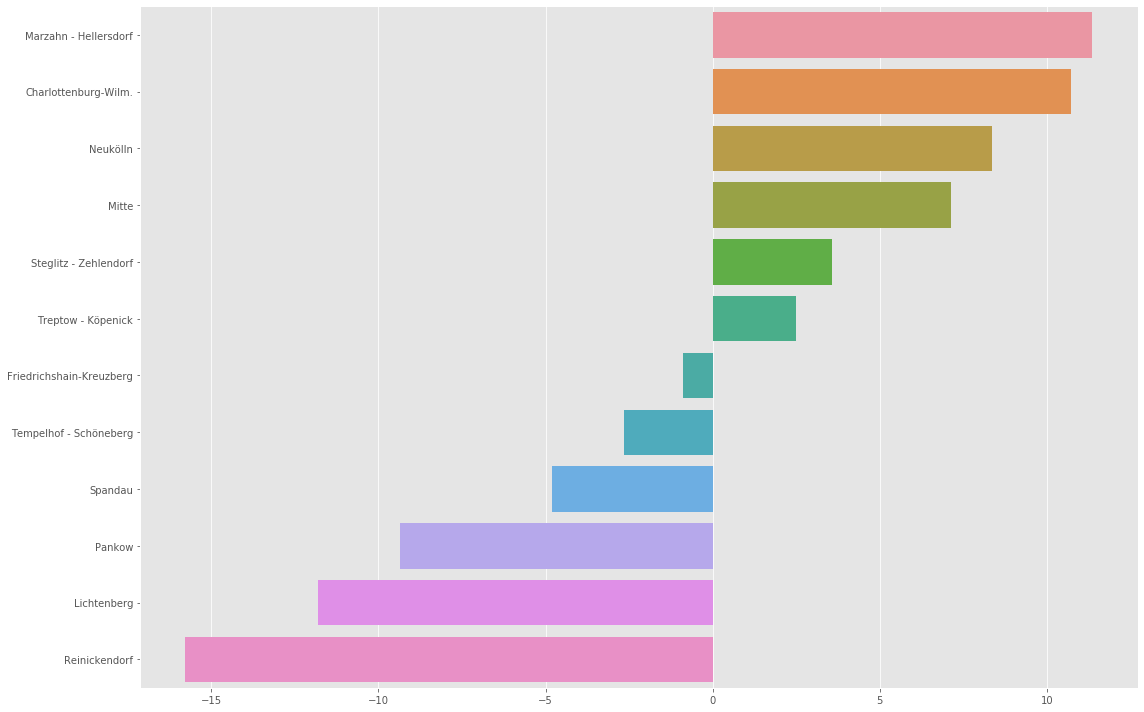

In [30]:
plt.figure(figsize=(16,10))
sns.barplot(x=[n[0] for n in neighborhood_impact], y=[n[1] for n in neighborhood_impact], orient='h')
plt.tight_layout()
#plt.savefig('neighboorhoods.png')

So as we can see clearly that Marzahn-Hellersdorf, Charlottenburg-Wilmersdorf, Neukölln and finally Mitte, have the most positive effect on price. 

### What features have an impact on the price?


In [31]:
amenity_impact = [i for i in coefs if i[1] in unique_amenities]
amenity_impact.sort(reverse=True)
amenity_impact

[(74.7291908481016, 'Fireplace guards'),
 (70.58897885545893, 'Air conditioning'),
 (61.13360338634588, 'Lock on bedroom door'),
 (60.91245792330459, 'Iron'),
 (58.76559604214356, 'Smart TV'),
 (56.25204511843769, 'Breakfast table'),
 (34.325788319444015, 'Stair gates'),
 (34.32578831944351, 'DVD player'),
 (22.69350394609879, 'Shampoo'),
 (20.953672585759463, 'Pocket wifi'),
 (20.740135896389337, 'EV charger'),
 (19.411389607931536, 'Elevator'),
 (17.271325088824092, 'Mobile hoist'),
 (17.271325088823986, 'High chair'),
 (15.781677725230637, 'Pool with pool hoist'),
 (15.019205583825636, 'En suite bathroom'),
 (12.250010251648145, 'Gas oven'),
 (11.43588065254962, 'Beach view'),
 (11.30594830753264, 'Other'),
 (11.305672390385341, 'Heated floors'),
 (11.071269082298592, 'Other pet(s)'),
 (10.920691593141415, 'Free street parking'),
 (10.312587019835712, 'Flat path to guest entrance'),
 (8.956284342679698, 'Bath towel'),
 (8.956284342679085, 'Bed linens'),
 (8.332191100128199, 'Project

In [32]:
cleaned = [x for x in amenity_impact if x[0] < -8 or x[0] >10]
cleaned

[(74.7291908481016, 'Fireplace guards'),
 (70.58897885545893, 'Air conditioning'),
 (61.13360338634588, 'Lock on bedroom door'),
 (60.91245792330459, 'Iron'),
 (58.76559604214356, 'Smart TV'),
 (56.25204511843769, 'Breakfast table'),
 (34.325788319444015, 'Stair gates'),
 (34.32578831944351, 'DVD player'),
 (22.69350394609879, 'Shampoo'),
 (20.953672585759463, 'Pocket wifi'),
 (20.740135896389337, 'EV charger'),
 (19.411389607931536, 'Elevator'),
 (17.271325088824092, 'Mobile hoist'),
 (17.271325088823986, 'High chair'),
 (15.781677725230637, 'Pool with pool hoist'),
 (15.019205583825636, 'En suite bathroom'),
 (12.250010251648145, 'Gas oven'),
 (11.43588065254962, 'Beach view'),
 (11.30594830753264, 'Other'),
 (11.305672390385341, 'Heated floors'),
 (11.071269082298592, 'Other pet(s)'),
 (10.920691593141415, 'Free street parking'),
 (10.312587019835712, 'Flat path to guest entrance'),
 (-8.674854263555822, 'Fixed grab bars for shower'),
 (-8.722272130492222, 'Coffee maker'),
 (-9.7541

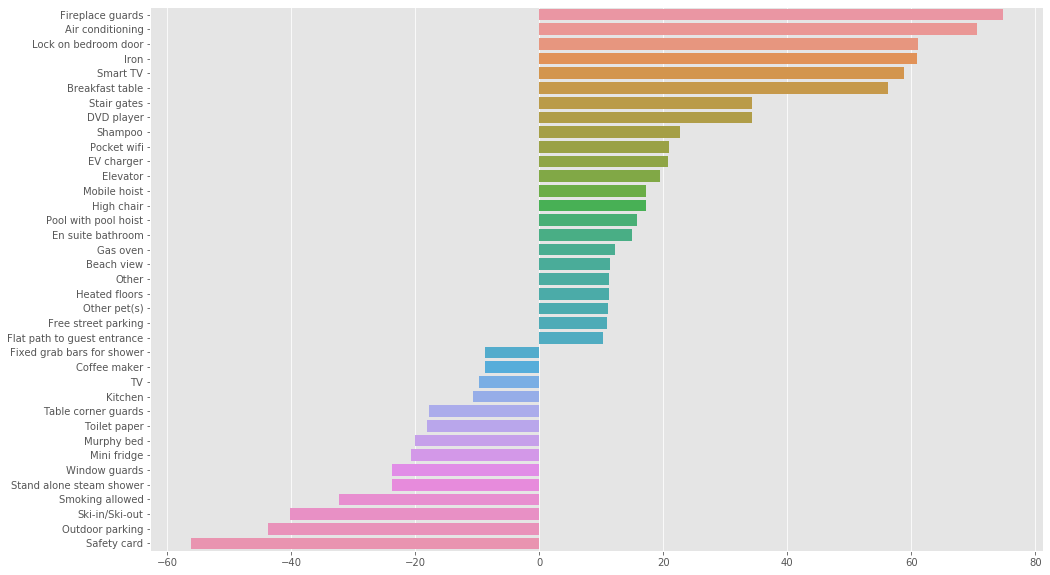

In [33]:
plt.figure(figsize=(16,10))
sns.barplot(x=[n[0] for n in cleaned], y=[n[1] for n in cleaned], orient='h')
# plt.savefig('amenities.png')